<a href="https://colab.research.google.com/github/ferit-qc/lab1/blob/main/lab1_HelloQuantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1 - Introduction to Quantum Computing with Qiskit

These laboratory excersises are solved on Google Colab and are saved on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **that has your name in it**.

# Introduction to Quantum Computing with Qiskit
Quantum computing leverages the principles of quantum mechanics—such as superposition, entanglement, and interference—to perform computations that are difficult or impossible for classical computers.

Qiskit (Quantum Information Science Kit) is an open-source SDK developed by IBM that allows users to design, simulate, and execute quantum algorithms on both simulators and real quantum hardware.

With Qiskit, we can:

* Build quantum circuits using intuitive Python code,
* Simulate their behavior using classical backends like AerSimulator,
* Run circuits on actual IBM Quantum devices through the cloud,
* Visualize results with tools like plot_histogram, Bloch spheres, and statevector plots.

In this notebook, we'll explore how to create basic quantum circuits, simulate them, and interpret the results—all using Qiskit.

## Creating an IBM Quantum Account

To run your quantum circuits on real quantum hardware provided by IBM, you’ll need to create a free IBM Quantum account.

You can sign up here: https://quantum.ibm.com/

IBM Quantum provides extensive documentation and learning resources to support your journey into quantum computing. You can access tutorials, API references, example circuits, and guided learning paths directly through the [IBM Quantum documentation](https://docs.quantum.ibm.com/) and the [Qiskit documentation](https://www.ibm.com/quantum/qiskit). These resources are ideal for learners at all levels—from beginners to advanced users.

Additionally, when using IBM’s real quantum devices, keep in mind that access is time-limited and shared among all users globally, so your jobs may enter a queue before execution. Simulators are often faster and recommended for testing before submitting to real hardware.

The [IBM Quantum Composer](https://quantum.ibm.com/composer/) is a web-based visual tool that allows users to create, edit, and run quantum circuits without writing any code. It provides a drag-and-drop interface where you can place quantum gates, measure qubits, and build circuits interactively. This is especially useful for beginners who want to learn the basics of quantum computing concepts such as superposition, entanglement, and quantum measurement. Once a circuit is built, it can be simulated or executed on real IBM quantum devices directly from the browser, making the Composer a powerful and accessible learning tool for exploring quantum algorithms.

## Lets get started with Lab1 !

To get started with Qiskit and run quantum circuits locally or on IBM Quantum hardware, install the required Python packages using the following commands:

In [175]:
pip install qiskit qiskit-ibm-runtime

In [176]:
pip install qiskit qiskit-aer

In [177]:
pip install matplotlib

In [178]:
pip install pylatexenc

In [179]:
%matplotlib inline

These imports load the essential tools for working with quantum circuits in Qiskit:

In [180]:
from qiskit import *   # Imports core Qiskit classes (QuantumCircuit, transpile, etc.)
from qiskit_aer.aerprovider import AerSimulator # Provides access to the local quantum circuit simulator
from qiskit.visualization import plot_histogram # Enables visualization of measurement results
import matplotlib.pyplot as plt # Standard Python plotting library
from IPython.display import display # Allows rich display of plots in Jupyter notebooks
from IPython.display import Image
from IPython.core.display import HTML
import math

## Qubits and Quantum Gates

In quantum computing, the basic unit of information is the qubit (quantum bit). Unlike a classical bit, which can be either $0$ or $1$, a qubit can exist in a superposition of both states simultaneously. Mathematically, a qubit’s state is written as:

![](https://i.postimg.cc/4NkkbwnT/image.png)

where 𝛼 and 𝛽 are complex numbers such that ![image.png](https://i.postimg.cc/V626FM0H/image.png). When a qubit is measured, it collapses to either 0 or 1 with probabilities ![alfa](https://i.postimg.cc/WbwNdx8y/image.png), and ![beta](https://i.postimg.cc/hjW6btP1/image.png), respectively.

### Quantum Gates

Quantum gates are the building blocks of quantum circuits. They are reversible operations that change the state of qubits, and are represented by unitary matrices. Here are some of the most important gates.

---
#### Hadamard Gate

![hadamradgate](https://i.postimg.cc/L6WpgRfN/image.png)

Hadamard gates are very often used since they create a superposition state.

---

#### CNOT Gate

![cnotgate](https://i.postimg.cc/wvnrTxnm/image.png)

A two-qubit gate that flips the target qubit if the control qubit is $1$.
Essential for creating entanglement.

---

#### Pauli X,Y,Z Gates

![paulixgate](https://i.postimg.cc/qBjtYhVq/image.png)

X gate flips $0$ and $1$.
Y combines both qubits with a phase shift.
Z flips the phase of $1$.

---

#### Phase Gates S and T

![phasegatesST](https://i.postimg.cc/zf75BhkR/image.png)

Apply specific phase rotations to qubits. Important for interference and gate decomposition.


---

#### Swap Gate

![swap](https://i.postimg.cc/BnqJGNTG/image.png)

Exchanges the states of two qubits. If qubit A is in state |ψ⟩ and qubit B is in state |φ⟩, after a SWAP gate: A becomes |φ⟩, and B becomes |ψ⟩. Useful for reordering qubits or routing information.

---

#### Controled Z

![controlledZ](https://i.postimg.cc/cJPq6cnC/image.png)

Applies a Z gate (phase flip) to the target qubit only if the control qubit is |1⟩.
It introduces a relative phase of -1 to the |11⟩ state.
Often used to create entanglement.

---

#### Controlled-phase

![controlledphase](https://i.postimg.cc/SNkBXRJ6/image.png)

Similar to CZ, but instead of flipping the phase by π, it applies an arbitrary phase shift to the target qubit when the control is |1⟩.
Often written as CU1(θ) where θ is the phase angle.

---

#### Toffoli

![toffoli](https://i.postimg.cc/3N7cDfJ8/image.png)

A controlled-controlled-X gate (2 control qubits, 1 target).
Flips the target qubit only if both control qubits are |1⟩.
It is the quantum equivalent of the classical AND gate and is universal for reversible classical logic.

---

#### Fredkin (controlled-swap)

![controlled-swap](https://i.postimg.cc/CMNvQNx8/image.png)

A controlled-SWAP gate. Swaps two qubits only if the control qubit is |1⟩. Useful for conditional logic and certain quantum algorithms (e.g. quantum fingerprinting).

---

#### Measurement

![measurement](https://i.postimg.cc/fyrYhkPG/image.png)

Measurement converts the quantum state into a classical result ($0$ or $1$) by collapsing the qubit’s superposition.

---

### Entanglement and Interference

Two or more qubits can become **entangled**, meaning their states are linked regardless of distance. Entanglement is a key resource in quantum computing, enabling phenomena like quantum teleportation and quantum parallelism.

**Interference** allows quantum algorithms to amplify correct answers and cancel out incorrect ones, giving them an advantage over classical algorithms.

Together, qubits and quantum gates form the foundation for building quantum circuits and algorithms like Grover's Search, Shor's Factoring, and Quantum Fourier Transform.


## Creating an Entangled Quantum Circuit

**Example 1. Implement Hadamard + CNOT circuit.**


We will first show how to implement Hadamard + CNOT entanglement circuit shown in the image below:

![hadamard cnot gate - entangelment.jpg](https://i.postimg.cc/vHpb4bwb/hadamard-cnot-gate-entangelment.jpg)


The circuit shown above demonstrates the creation of a Bell state, one of the simplest and most important examples of quantum entanglement. It consists of two key gates:

1. Hadamard gate (H) applied to qubit 0:
This puts the qubit into a superposition, resulting in the state

![screenshot_1742894890996.png](https://i.postimg.cc/2j15yHLd/image.png)

2. CNOT gate with qubit 0 as the control and qubit 1 as the target:
This entangles the qubits. The target qubit ($q_1$) is flipped if the control qubit ($q_0$) is in the state |1⟩.

After these gates are applied, the system is in the entangled Bell state:

![](https://i.postimg.cc/rsHj8fbF/image.png)

Finally,when measured, the results will always be correlated—if one qubit is $0$, the other will also be $0$; if one is $1$, the other will be $1$. This is a hallmark of entanglement. We will see all this while implementing example 1.

So, let's start with the circuit itself. In order to create the circuit, we need to register something called **QuantumCircuit**. First 2 means register me 2 qubits ($q_0$, $q_1$), and the second 2 means register me 2 classical bits ($c_0$, $c_1$). We need two classical bits, one for each qubit, since they are connected to measurements.

In [181]:
circuit = QuantumCircuit(2,2)

Now we have created a circuit that has 2 qubits and 2 classical bits and our curret state now looks like this:

![two qubits and two bits](https://i.postimg.cc/FHXcjYMK/two-qubits-two-bits.jpg)


We can now draw our circuit.

In [182]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

As you may noticed, when drawing circuit in this way, we don't see much. Therefore, we will use functions from matplotlib to better represent it.

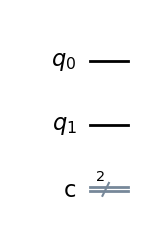

In [183]:
circuit.draw(output = 'mpl')

We will now apply Hadamard gate to our qubit $q_0$. In order to apply gate we can use the circuit itself which is already embended in circuit property. Hadamard gate is marked as $h$. We also need to specify which qubit we will be putting it on.

This creates a superposition.

Since we want it on $q_0$ we will call it as $0$. If we wanted to apply Hadamard gate on multiply qubits, for example two, we would use lists, something like $[0,1]$. So lets apply Hadamard gate to $q_0$ qubit:

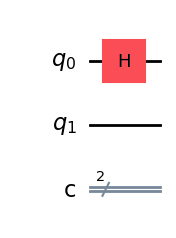

In [184]:
#applying Hadamard gate
circuit.h(0)
#drawing the circuit:
circuit.draw(output = 'mpl')

Now lets add CNOT gate to $q_1$ qubit. Remember, it checks to see if control qubit is in the state 1 and if that is the case it applies NOT gate on the 1. In other words, this entangles the two qubits. If qubit 0 is 1, qubit 1 gets flipped.  

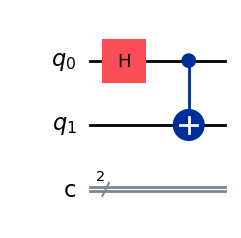

In [185]:
circuit.cx(0,1) # 0-> is control qubit, 1-> target qubit
circuit.draw(output = 'mpl')

Now we can add meassurement. For measurement we can specify which qubits we want to measure (we can measure only one, or both).
Another important thing to do is associate the measurements with classical bits.

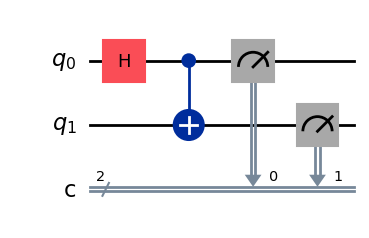

In [186]:
circuit.measure([0,1], [0,1])  #measures qubit 0 -> classical bit 0 and qubit 1 -> classical bit 1
circuit.draw(output = 'mpl')

Now that we measured it, we can see that we got the exact the same thing we had in **Qubit Composer**: we have two qubits ($q_0$, $q_1$), two classical bits ($c_0$,$c_1$), one Hadamard gate, and one XNOT gate.

This is our first circuit ever, this is the **Hello Quantum** circuit. Right now, the states should be entangeled together. In order to confirm they are entangeled together we need to execute this on quantum simulator (or on real quantum computer) to get the result and see if we will really get $00$ and $11$ states as a result.

In order to run it on simulator, we need to use **Aer module**.







In [187]:
# Create simulator instance
# Think of this as your “virtual quantum computer” to test your circuit.
simulator = AerSimulator()

Transpilation is like “compiling” your circuit. It adapts the circuit to match the simulator's capabilities and optimizes it for performance or hardware constraints.

In [188]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

In [189]:
# Runs the transpiled circuit on the simulator
result = simulator.run(compiled_circuit, shots=1024).result()

In [190]:
# Get measurement counts
counts = result.get_counts()
# Show the result
print("Measurement Counts:", counts)

Measurement Counts: {'11': 547, '00': 477}


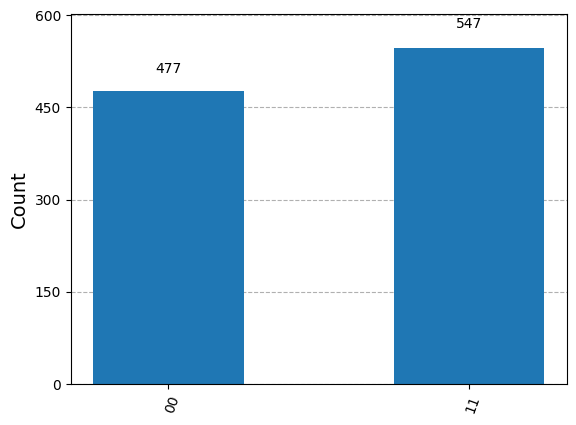

In [191]:
#Plots a histogram of how often each result was observed.
hist = plot_histogram(counts)
display(hist)

We see that they are in entangeled state.

## Creating the Toffoli Gate - CCX Gate

**Example 2. Implement CCX Gate.**

The Toffoli gate is a three qubit gate with two controls and one target. It performs an X on the target only if both controls are in the state 1. The final state of the target is then equal to either the AND or the NAND of the two controls, depending on whether the initial state of the target was 0 or 1. A Toffoli can also be thought of as a controlled-controlled-NOT, and is also called CCX gate.



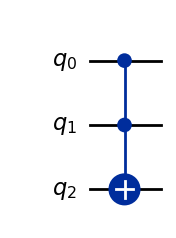

In [192]:
## Toffoli with control qubits a and b and target qubit t
circuittofolli = QuantumCircuit(3)
a = 0
b = 1
t = 2
circuittofolli.ccx(a,b,t)
circuittofolli.draw(output = 'mpl')

## Phase - Z Gate

The Z gate, also called the Phase Flip Gate, is one of the fundamental single-qubit gates in quantum computing. It applies a phase of π (180°) to the |1⟩ component of a qubit, leaving the |0⟩ state unchanged.

When applied to a general qubit state:

![zgate](https://i.postimg.cc/tgrM8CXR/image.png)

The Z gate transforms it to:

![zgate2](https://i.postimg.cc/6qZb7rCT/image.png)

Only the phase of the |1⟩ term is flipped (multiplied by -1). The probabilities of measuring 0 or 1 stay the same, because quantum measurements depend on the squared magnitudes ![](https://i.postimg.cc/sx8yz4sX/image.png) and ![](https://i.postimg.cc/DzFh7Zkq/image.png),  which are unaffected by phase.

Phases don’t always affect individual measurements, but they do affect interference in multi-qubit systems. The Z gate becomes powerful when used in superpositions or entangled states, where relative phase matters. It's a key gate in the Pauli group and forms the basis for more complex gates like S, T, and controlled-Z.

**Apply Hadamard → Z → Hadamard to |0⟩** as shown in image below:
![](https://i.postimg.cc/QtCdrt1f/image.png)

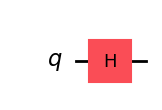

In [193]:
qczgate = QuantumCircuit(1)

# apply Hadamard to $q_0$
qczgate.h(0)
qczgate.draw(output = 'mpl')


On a Bloch Sphere, the qubit is represented as:

![](https://i.postimg.cc/8CHm0ymh/image.png)



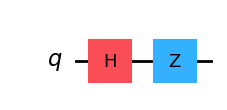

In [194]:
# apply Z Gate to $q_0$
qczgate.z(0)
qczgate.draw(output = 'mpl')

If we look at the qubit on a Bloch Spehere, we see that now we have phase (marked in red).

![](https://i.postimg.cc/c4gTLBdS/image.png)

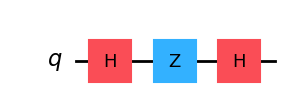

In [195]:
# apply Hadamard to $q_0$
qczgate.h(0)
qczgate.draw(output = 'mpl')

After applying Hadamard gate after Z gate, Bloch sphere looks like this:

![](https://i.postimg.cc/ZKxPR7XX/image.png)

The result will be |1⟩, showing that Z is equivalent to an X (NOT) gate in the Hadamard basis — highlighting how phase affects interference!

## Phase and Bloch Sphere

In quantum computing, a qubit is a two-level quantum system that can exist in a superposition of the basis states |0⟩ and |1⟩. A general qubit state can be written as:

![zgate](https://i.postimg.cc/tgrM8CXR/image.png)

where 𝛼 and 𝛽 are complex numbers that determine the amplitude and relative phase of the components. The global phase of a quantum state (multiplying the whole state by a complex constant $e^{iϕ}$ ) has no physical effect, but the relative phase between |0⟩ and |1⟩ is crucial, especially when qubits interfere or become entangled.

The Bloch sphere is a powerful geometric tool for visualizing the state of a single qubit. In this representation, the north pole represents |0⟩, the south pole |1⟩, and any point on the surface represents a valid pure state. The relative phase between |0⟩ and |1⟩ determines the direction of the qubit’s projection in the X-Y plane.

Phase gates like Z, S, and T modify this relative phase without changing the probability of measuring 0 or 1. On the Bloch sphere, this corresponds to a rotation around the Z-axis, causing the state vector to spin around the vertical axis without changing its length or polar angle. Although these rotations don't affect measurement in the Z-basis directly, they are fundamental for controlling quantum interference and building universal quantum gates.



In [196]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

In [197]:
qasm_simulator = AerSimulator()                      # For running noisy or sampled simulations
statevector_simulator = AerSimulator(method='statevector')  # For exact quantum state simulation

In [198]:
def run_on_simulators(circuit):
    # Copy the circuit so we can keep the original clean
    circuit_sv = circuit.copy()
    circuit_qasm = circuit.copy()

    # Get the statevector (before measurement)
    statevec = Statevector.from_instruction(circuit_sv)

    # Add measurement to the copy used for qasm simulation
    num_qubits = circuit_qasm.num_qubits
    circuit_qasm.measure(range(num_qubits), range(num_qubits))

    # Transpile and run the qasm simulation (sampling-based)
    compiled_circuit = transpile(circuit_qasm, qasm_simulator)
    result = qasm_simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    return statevec, counts

**Example 3. Different Phases and Bloch Spheres**

In this example, we will implement different gates and take a look how they influence phase. **Write a comment about it under each example.**

1. Initial state |00⟩: Displays Bloch vectors of both qubits in the ground state (pointing up on the Z-axis).

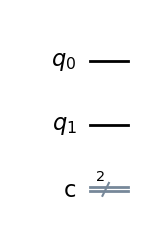

In [199]:
# Create a 2-qubit, 2-classical-bit quantum circuit
circuit = QuantumCircuit(2, 2)

# Run the circuit on both statevector and qasm simulators
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')

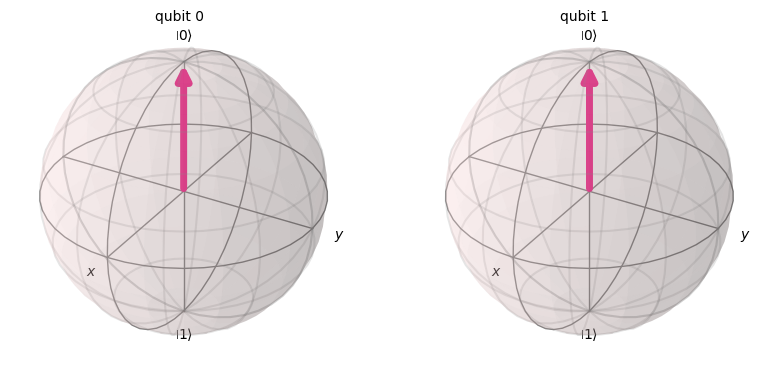

In [200]:
plot_bloch_multivector(statevec)

**Write a comment here:**

2. Apply Hadamard on qubit 0: Creates superposition. Qubit 0 moves to the equator (X-axis), qubit 1 stays at |0⟩.

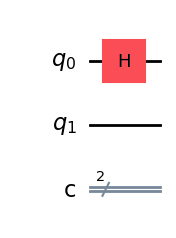

In [201]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')

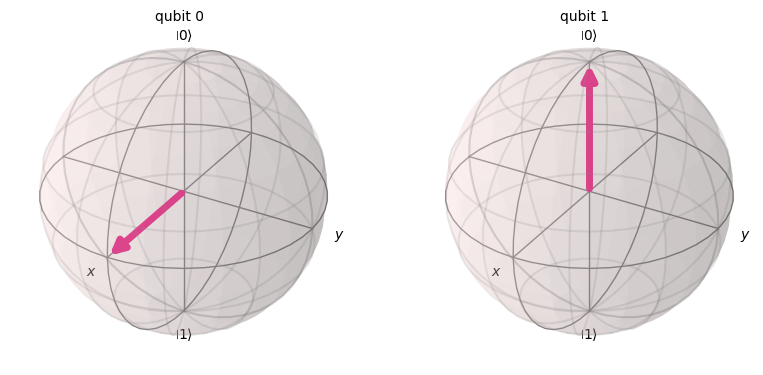

In [202]:
plot_bloch_multivector(statevec)

**Write a comment here:**

3. Bell state with H + CNOT: Entangles the qubits. Bloch vectors of individual qubits appear depolarized due to entanglement.

In [203]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)

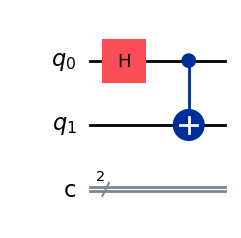

In [204]:
circuit.draw(output = 'mpl')

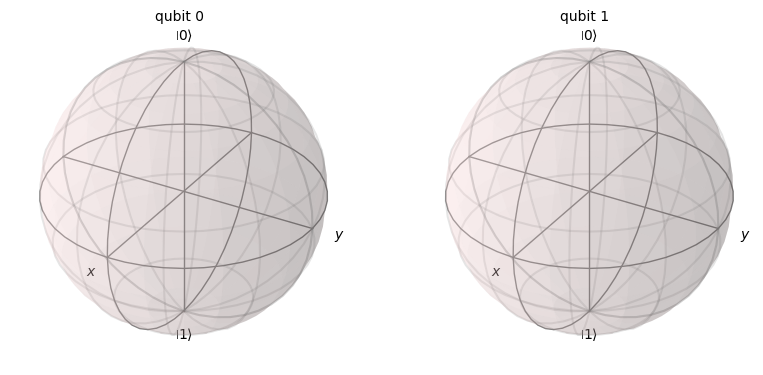

In [205]:
plot_bloch_multivector(statevec)

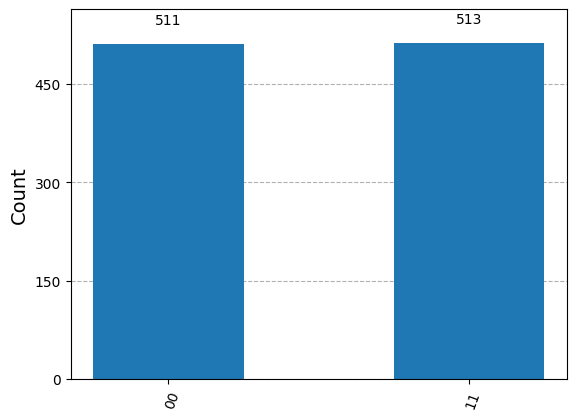

In [206]:
plot_histogram([counts])

**Write a comment here:**

4. RX rotations: Rotates qubits around the X-axis by π/4 and π/2 radians respectively.

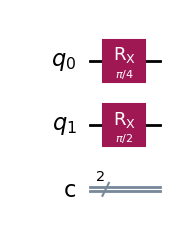

In [207]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')

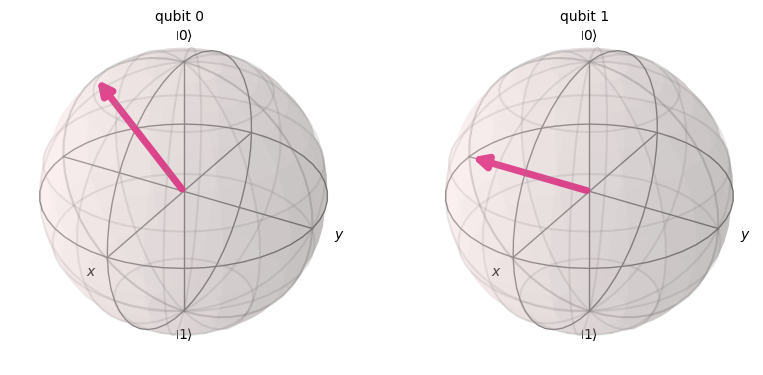

In [208]:
plot_bloch_multivector(statevec)

**Write a comment here:**

5.  RY rotations: Rotates qubits around the Y-axis.

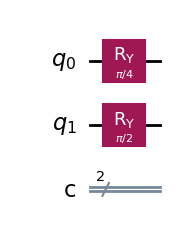

In [209]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0)
circuit.ry(math.pi / 2, 1)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')

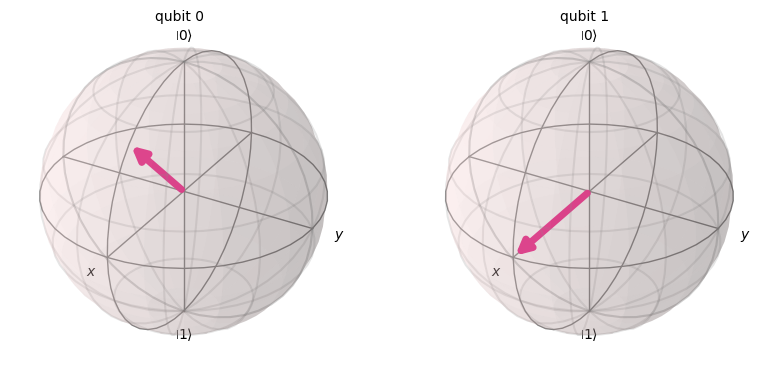

In [210]:
plot_bloch_multivector(statevec)

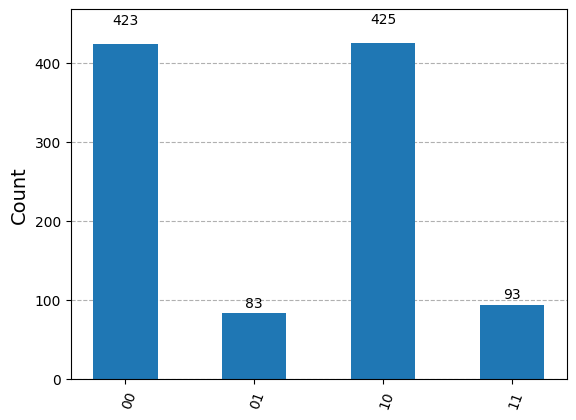

In [211]:
plot_histogram([counts])

**Write a comment here:**

6.  H on 1-qubit: Shows |+⟩ state (lies on the X-axis).

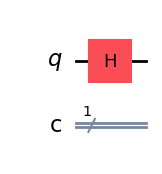

In [212]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')

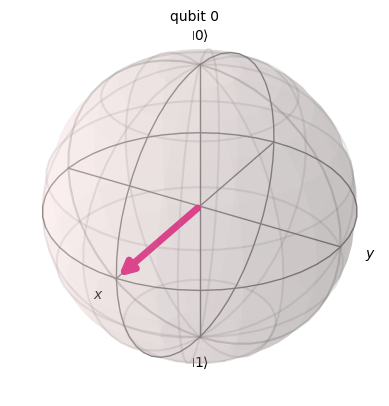

In [213]:
plot_bloch_multivector(statevec)

**Write a comment here:**

7. H + Z: Adds phase shift to |+⟩, moving it to |−⟩ state (on negative X-axis).

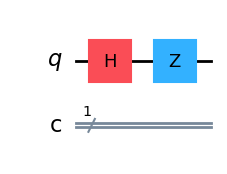

In [214]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
circuit.draw(output = 'mpl')


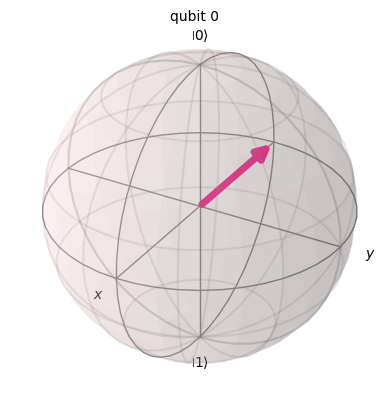

In [215]:
plot_bloch_multivector(statevec)

**Write a comment here:**

# Tasks

## Task 1. Creating Hadamard + Controlled-Z (CZ) Gate

This circuit is fundamental in creating cluster states and stabilizer circuits, both important in quantum error correction, measurement-based quantum computing, and quantum teleportation.

In order to construct it, we have to:
1.  Apply Hadamard to qubit $q_0$ to obtain superposition state
2.  Apply controlled-Z (CZ) gate between $q_0$ and $q_1$

This creates a maximally entangled state, but in a different basis than CNOT. It’s commonly used to generate graph states, the core of measurement-based quantum computation (MBQC).



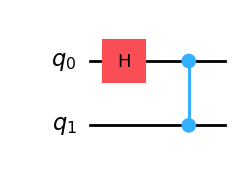

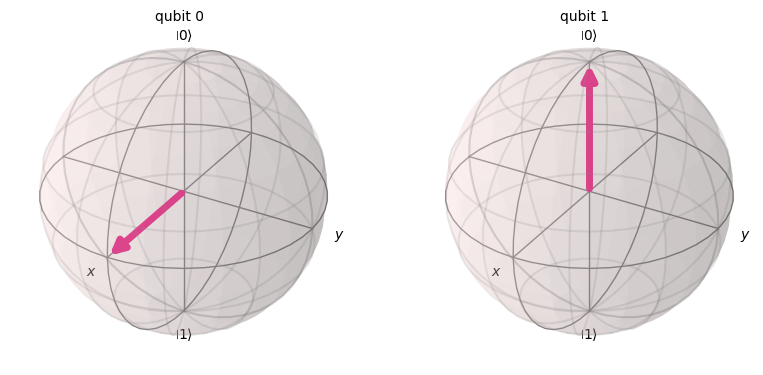

In [216]:
qc = QuantumCircuit(2)

qc.h(0)

qc.cz(0, 1)

display(qc.draw('mpl'))

state = Statevector.from_instruction(qc)

display(plot_bloch_multivector(state))

## Task 2: Create a 3-Qubit Linear Cluster State

Extend the 2-qubit Hadamard + CZ circuit into a 3-qubit linear cluster state, a basic structure in measurement-based quantum computing (MBQC).
Steps:
1. Initialize a 3-qubit circuit: q0, q1, and q2.
2. Apply Hadamard gates to all three qubits to place them in superposition.
3. Apply CZ gates between:
*   $q_0$ and $q_1$
*   $q_1$ and $q_2$

Measure the qubits in different bases (X, Z) and observe correlations.

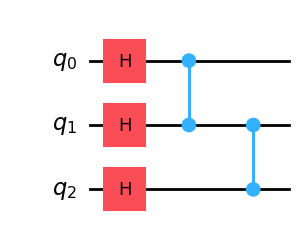

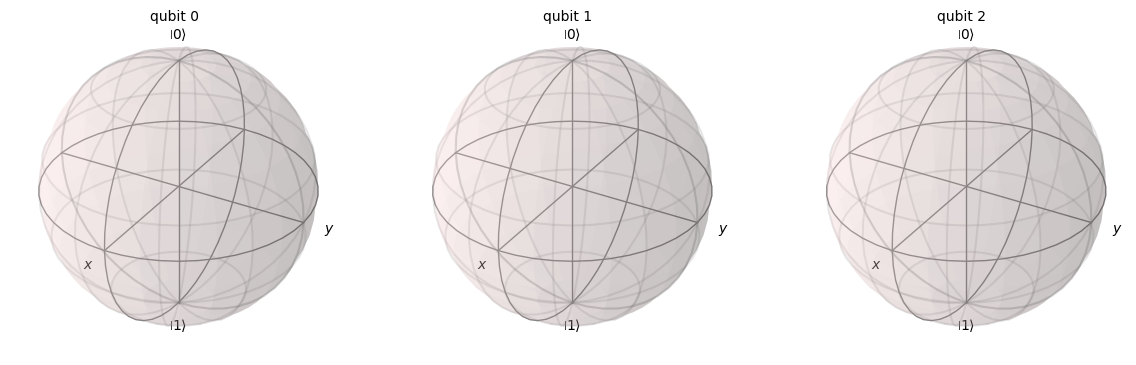

In [217]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

qc.cz(0, 1)
qc.cz(1, 2)

display(qc.draw('mpl'))

state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

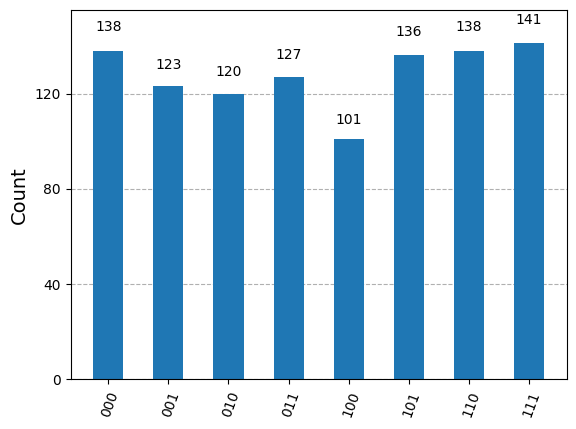

In [218]:
qc.measure_all()

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
img = plot_histogram(counts)
display(img)

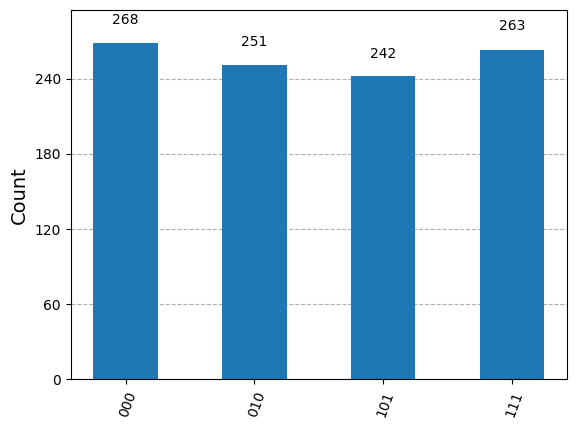

In [219]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.cz(0, 1)
qc.cz(1, 2)

qc.h(0)
qc.h(1)
qc.h(2)
qc.measure([0, 1, 2], [0, 1, 2])

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
img = plot_histogram(counts)
display(img)

## Task 3: Implement a 3-Qubit GHZ State + Phase Kickback with CZ

Build a 3-qubit GHZ (Greenberger–Horne–Zeilinger) state and use an extra CZ gate to simulate phase kickback, a critical concept in phase estimation, modular arithmetic, and quantum Fourier transform.

Steps:
1. Create a 3-qubit circuit.
2. Apply Hadamard to q0.
3. Apply CNOT from q0 to q1, and from q0 to q2. This creates the GHZ state.
4. Apply a Z gate or CZ between q2 and an ancilla/control qubit q3 to simulate a phase-controlled operation.

Measure all qubits. Analyze how entanglement and phase gates propagate through the circuit — what happens when you apply Z only to one qubit in a GHZ state?

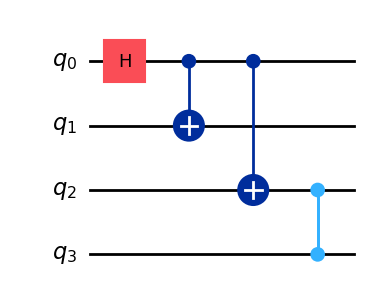

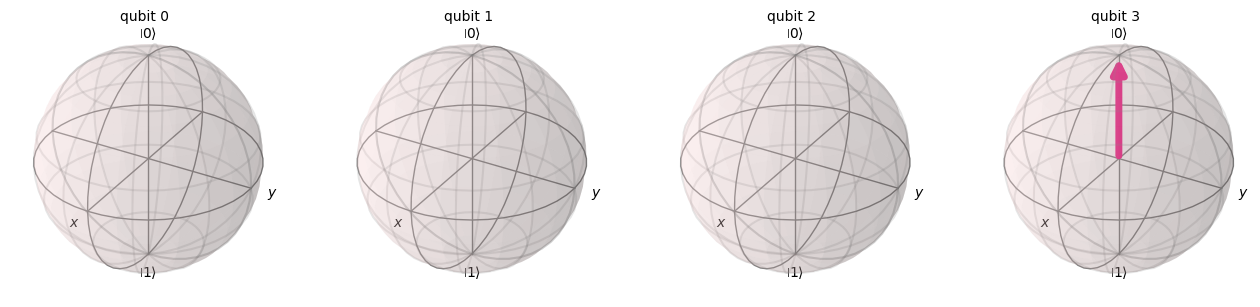

In [173]:
qc = QuantumCircuit(4)

qc.h(0)

qc.cx(0, 1)

qc.cx(0, 2)

qc.cz(2, 3)

display(qc.draw('mpl'))

state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

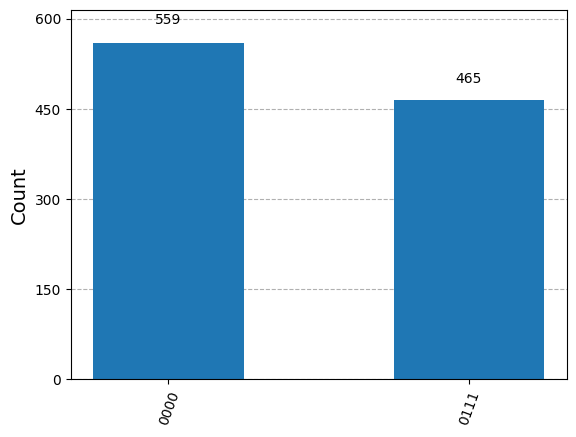

In [174]:
qc.measure_all()

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled).result()
counts = result.get_counts()

plot_histogram(counts)
img = plot_histogram(counts)
display(img)


## Task 4: Demonstrate Phase Kickback Using the Controlled-Z Gate and Bloch Sphere Visualization

Understand and visualize the phenomenon of phase kickback, where a phase operation applied to a target qubit affects the control qubit’s phase due to entanglement — even though no gate was directly applied to it.

Steps:
1. Create a 2-qubit circuit.
2. Initialize $q_0$ in a superposition using a Hadamard gate (this will be the control qubit).
3. Prepare $q_1$ in state |1⟩ (apply X gate to flip from |0⟩ to |1⟩).
4. Apply a Controlled-Z (CZ) gate between $q_0$ and $q_1$.
5. Extract and plot the Bloch vector of $q_0$ (the control qubit) using plot_bloch_multivector().
6. Repeat the same circuit without the CZ gate and compare the Bloch vector of $q_0$.

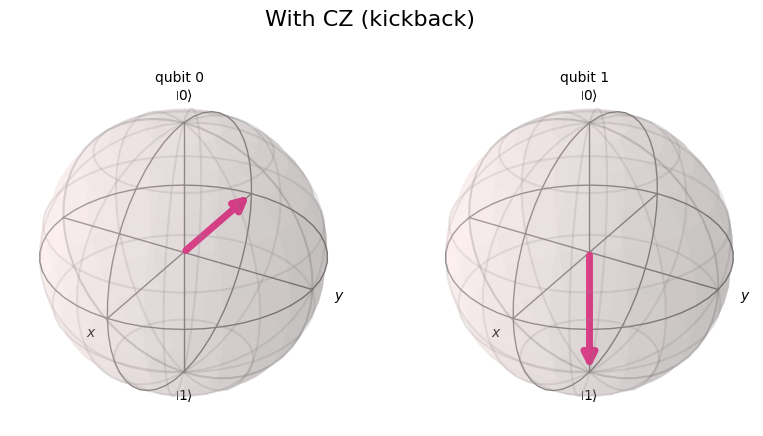

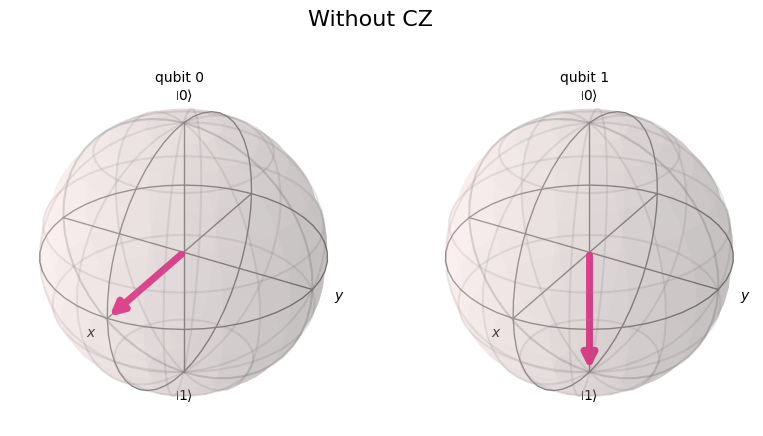

In [221]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display

#Verzija 1: S CZ (kickback)
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.cz(0, 1)

state1 = Statevector.from_instruction(qc1)

display(plot_bloch_multivector(state1, title="With CZ (kickback)"))

#Bez CZ (kontrola)
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.x(1)

state2 = Statevector.from_instruction(qc2)

display(plot_bloch_multivector(state2, title="Without CZ"))